In [1]:
import pandas as pds
import math
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# Download GTFS

In [8]:
!wget https://www.rtd-denver.com/files/gtfs/google_transit.zip 

--2026-01-24 16:16:30--  https://www.rtd-denver.com/files/gtfs/google_transit.zip
Resolving www.rtd-denver.com (www.rtd-denver.com)... 104.18.3.30, 104.18.2.30, 2606:4700::6812:31e, ...
Connecting to www.rtd-denver.com (www.rtd-denver.com)|104.18.3.30|:443... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: /api/download?feedType=gtfs&filename=google_transit.zip [following]
--2026-01-24 16:16:30--  https://www.rtd-denver.com/api/download?feedType=gtfs&filename=google_transit.zip
Reusing existing connection to www.rtd-denver.com:443.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://nodejs-prod.rtd-denver.com/api/download/gtfs/google_transit.zip [following]
--2026-01-24 16:16:30--  https://nodejs-prod.rtd-denver.com/api/download/gtfs/google_transit.zip
Resolving nodejs-prod.rtd-denver.com (nodejs-prod.rtd-denver.com)... 104.18.2.30, 104.18.3.30, 2606:4700::6812:21e, ...
Connecting to nodejs-prod.rtd-denver.com (nodejs-pro

In [9]:
!mkdir -p data
!mv google_transit.zip ./data/
!unzip ./data/google_transit.zip -d ./data/

Archive:  ./data/google_transit.zip
  inflating: ./data/agency.txt       
  inflating: ./data/areas.txt        
  inflating: ./data/calendar.txt     
 extracting: ./data/calendar_dates.txt  
  inflating: ./data/fare_leg_rules.txt  
  inflating: ./data/fare_media.txt   
  inflating: ./data/fare_products.txt  
  inflating: ./data/fare_transfer_rules.txt  
  inflating: ./data/feed_info.txt    
  inflating: ./data/networks.txt     
  inflating: ./data/routes.txt       
  inflating: ./data/route_networks.txt  
  inflating: ./data/shapes.txt       
  inflating: ./data/stops.txt        
  inflating: ./data/stop_areas.txt   
  inflating: ./data/stop_times.txt   
  inflating: ./data/trips.txt        


# Headway times

In [82]:
def make_time_delta(start_time, end_time):
    start_h, start_m, start_s = start_time.split(":")
    end_h, end_m, end_s = end_time.split(":")
    return datetime.timedelta(
        hours=int(end_h) - int(start_h),
        minutes=int(end_m) - int(start_m),
        seconds=int(end_s) - int(start_s),
    )


make_time_delta("11:34:00", "11:35:56")


datetime.timedelta(seconds=116)

In [83]:
stoptimesdf = pds.read_csv("data/stop_times.txt", sep=",").merge(
    pds.read_csv("data/trips.txt"),
    on="trip_id",
    how="left",
).merge(
    pds.read_csv("data/routes.txt"),
    on="route_id",
    how="left"
).merge(
    pds.read_csv("data/stops.txt"),
    on="stop_id",
    how="left"
)

stoptimesdf

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,...,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding,platform_code
0,115699058,11:34:00,11:34:00,26175,1,NaN,0,1,NaN,1,...,Vehicles Travelling North,39.655756,-104.999554,NaN,NaN,0,33712.0,NaN,1,C
1,115699058,11:35:56,11:35:56,20171,2,NaN,0,0,NaN,0,...,Vehicles Travelling South,39.655710,-104.993607,NaN,NaN,0,NaN,NaN,1,NaN
2,115699058,11:37:18,11:37:18,20094,3,NaN,0,0,NaN,0,...,Vehicles Travelling East,39.654834,-104.989100,NaN,NaN,0,NaN,NaN,1,NaN
3,115699058,11:38:04,11:38:04,33371,4,NaN,0,0,NaN,0,...,Vehicles Travelling North,39.656238,-104.987535,NaN,NaN,0,NaN,NaN,1,NaN
4,115699058,11:38:33,11:38:33,12522,5,NaN,0,0,NaN,0,...,Vehicles Travelling North,39.657858,-104.987490,NaN,NaN,0,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796571,115868111,16:34:58,16:34:58,23221,54,NaN,0,0,NaN,0,...,Vehicles Travelling Southeast,39.755072,-104.990615,NaN,NaN,0,NaN,NaN,1,NaN
796572,115868111,16:36:26,16:36:26,12508,55,NaN,0,0,NaN,0,...,Vehicles Travelling South,39.752250,-104.987500,NaN,NaN,0,NaN,NaN,1,NaN
796573,115868111,16:37:22,16:37:22,12599,56,NaN,0,0,NaN,0,...,Vehicles Travelling South,39.749801,-104.987501,NaN,NaN,0,NaN,NaN,1,NaN
796574,115868111,16:38:41,16:38:41,19128,57,NaN,0,0,NaN,0,...,Vehicles Travelling South,39.746372,-104.987503,NaN,NaN,0,NaN,NaN,1,NaN


In [85]:
def _f(df):
    df = df.sort_values(by="stop_sequence")
    return pds.Series(
        {
            "trip_time_start": df.iloc[0]["arrival_time"],
            "trip_time_end": df.iloc[-1]["departure_time"],
        }
    )

routestartsdf = stoptimesdf.groupby(
    by=["route_id", "direction_id", "service_id", "trip_id"]
).apply(_f).reset_index()

routestartsdf

/tmp/ipykernel_5893/3948019615.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(_f).reset_index()


,route_id,direction_id,service_id,trip_id,trip_time_start,trip_time_end
0,0,0,SA,115699058,11:34:00,12:24:00
1,0,0,SA,115699059,12:04:00,12:54:00
2,0,0,SA,115699060,12:34:00,13:24:00
3,0,0,SA,115699061,04:52:00,05:31:00
4,0,0,SA,115699062,07:35:00,08:16:00
...,...,...,...,...,...,...
21129,SKIP,1,WK,115720766,20:04:00,20:28:00
21130,SKIP,1,WK,115720767,19:48:00,20:14:00
21131,SKIP,1,WK,115720768,19:33:00,19:59:00
21132,SKIP,1,WK,115720769,19:18:00,19:44:00


In [86]:
def _f(df):
    df = df.sort_values(by="trip_time_start")
    return pds.DataFrame(
        [
            [
                df["trip_time_start"].iloc[i],
                df["trip_id"].iloc[i],
                df["trip_id"].iloc[i + 1],
                make_time_delta(df["trip_time_start"].iloc[i], df["trip_time_start"].iloc[i + 1]).total_seconds() / 60.,
            ]
            for i in range(df.shape[0] - 1)
        ],
        columns=["time", "trip_id_1", "trip_id_2", "headway_minutes"]
    ).set_index("time")

headwaysdf = routestartsdf.groupby(
    by=["route_id", "direction_id", "service_id", ]
).apply(_f).reset_index()

headwaysdf

/tmp/ipykernel_5893/4267065974.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ).apply(_f).reset_index()
/tmp/ipykernel_5893/4267065974.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ).apply(_f).reset_index()


,route_id,direction_id,service_id,time,trip_id_1,trip_id_2,headway_minutes
0,0,0,SA,03:53:00,115699108,115699061,59.0
1,0,0,SA,04:52:00,115699061,115699068,44.0
2,0,0,SA,05:36:00,115699068,115699130,14.0
3,0,0,SA,05:50:00,115699130,115699090,15.0
4,0,0,SA,06:05:00,115699090,115699129,15.0
...,...,...,...,...,...,...,...
20478,SKIP,1,WK,21:40:00,115720734,115720733,13.0
20479,SKIP,1,WK,21:53:00,115720733,115720731,15.0
20480,SKIP,1,WK,22:08:00,115720731,115720730,30.0
20481,SKIP,1,WK,22:38:00,115720730,115720729,30.0


In [74]:
headwaysdf[(headwaysdf["service_id"] == "WK") | (headwaysdf["service_id"] == "MT")].to_csv("data/headways_weekdays.csv", index=False)

In [126]:
headwaysdf[(headwaysdf["service_id"] == "WK") | (headwaysdf["service_id"] == "MT")].to_json(
    "data/headways_weekdays.json", 
    orient="records"
)


/home/kc/Code/vega_lite_test/env/lib/python3.13/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kc/Code/vega_lite_test/env/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/kc/Code/vega_lite_test/env/lib/python3.13/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kc/Code/vega_lite_test/env/lib/python3.13/site-packages/seaborn/categorical.py:63

<Axes: xlabel='route_id', ylabel='headway_minutes'>

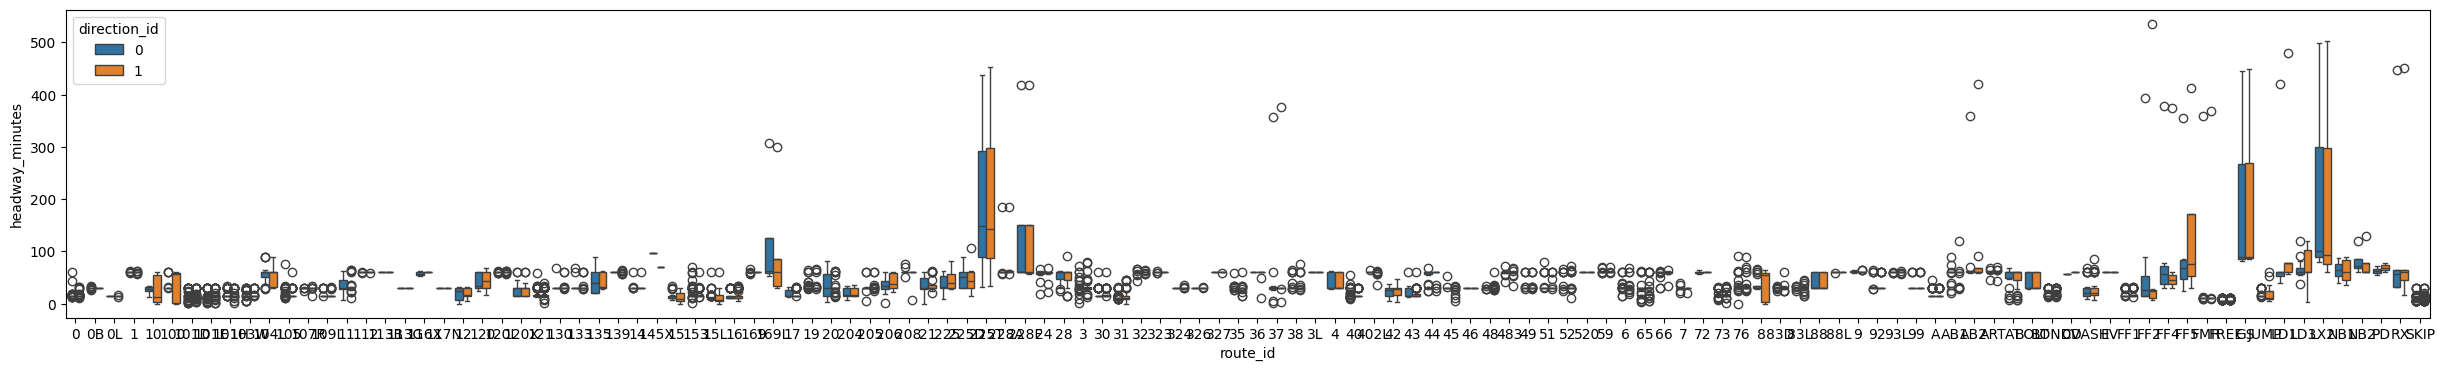

In [67]:
data = headwaysdf[
    (headwaysdf["service_id"]  == "WK")
    | (headwaysdf["service_id"] == "MT")
]

fig, ax = plt.subplots(figsize=(0.25 * len(data["route_id"].unique()), 4))
sns.boxplot(
    data=data,
    x="route_id",
    y="headway_minutes",
    hue="direction_id",
    ax=ax,
)

In [47]:
headwaysdf["service_id"].value_counts()

service_id
WK    6954
SA    6182
SU    5197
FR    1090
MT    1060
Name: count, dtype: int64

/home/kc/Code/vega_lite_test/env/lib/python3.13/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kc/Code/vega_lite_test/env/lib/python3.13/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/kc/Code/vega_lite_test/env/lib/python3.13/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/kc/Code/vega_lite_test/env/lib/python3.13/site-packages/seaborn/categorical.py:63

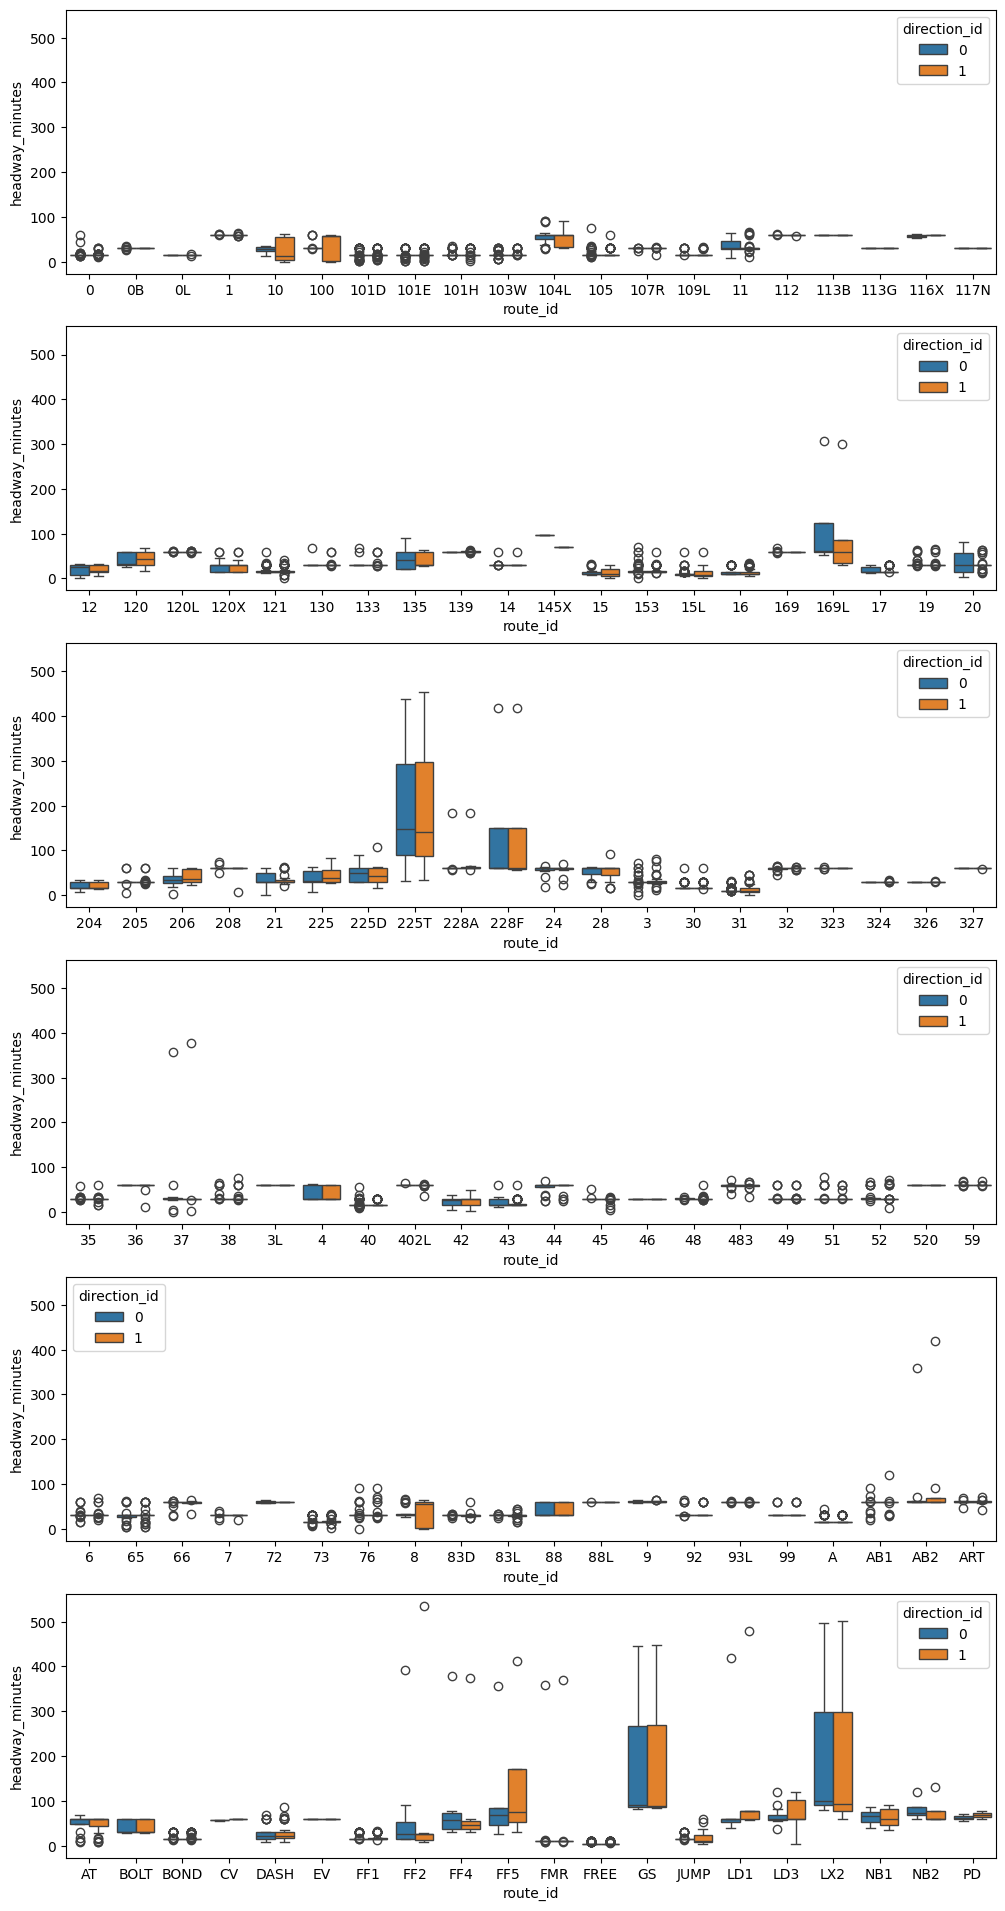

In [69]:
data = headwaysdf[
    (headwaysdf["service_id"]  == "WK")
    | (headwaysdf["service_id"] == "MT")
]

route_ids = sorted(data["route_id"].unique())
routes_per_row = 22
nrows = math.ceil(len(route_ids) / float(routes_per_row))

fig, axs = plt.subplots(figsize=(12, 4 * nrows), nrows=nrows, sharey=True)

for i, ax in zip(range(0, len(route_ids), 20), axs):
    #print(i, i + 20, len(route_ids))
    routes_in_row = route_ids[i: i + 20]
    df = data[data["route_id"].map(lambda x: x in set(routes_in_row))]
    sns.boxplot(
        data=df,
        x="route_id",
        order=routes_in_row,
        y="headway_minutes",
        hue="direction_id",
        ax=ax,
    )
    

In [90]:
data = headwaysdf[
    (headwaysdf["service_id"]  == "WK")
    | (headwaysdf["service_id"] == "MT")
]

data.groupby(by="route_id").apply(
    lambda df: df["headway_minutes"].describe()
).sort_values(by="50%")


/tmp/ipykernel_5893/2748939284.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data.groupby(by="route_id").apply(


headway_minutes,count,mean,std,min,25%,50%,75%,max
route_id,,,,,,,,
FREE,426.0,5.250000,1.803673,4.5,4.50,4.5,4.50,10.5
15,210.0,12.176190,7.149959,0.0,9.00,10.0,15.00,33.0
16,168.0,14.470238,7.572346,5.0,10.00,10.0,15.00,34.0
31,189.0,12.513228,7.819512,0.0,10.00,10.0,15.00,45.0
FMR,71.0,20.014085,58.988254,9.0,10.00,10.0,10.00,369.0
...,...,...,...,...,...,...,...,...
FF5,10.0,123.800000,139.756773,25.0,46.75,69.0,88.75,413.0
145X,2.0,83.000000,18.384776,70.0,76.50,83.0,89.50,96.0
GS,6.0,206.833333,186.444004,82.0,86.00,89.5,357.00,449.0


In [110]:
headways_url = "https://raw.githubusercontent.com/kcanderson/vega-lite-test/refs/heads/main/data/headways_weekdays.json"

alt.LayerChart(data=headways_url).encode(
    x=alt.X(
        'route_id:N',
        sort=alt.SortField(field="median"),
    ),
    tooltip=["min:Q", 'q1:Q', "median:Q", "mean:Q", 'q3:Q', "max:Q"],
).transform_aggregate(
    median="median(headway_minutes)",
    q1="q1(headway_minutes)",
    q3="q3(headway_minutes)",
    min="min(headway_minutes)",
    max="max(headway_minutes)",
    mean="mean(headway_minutes)",
    groupby=["route_id"],
).transform_filter(
    alt.FieldRangePredicate(field='median', range=[0, 50])
).add_layers(
    #alt.Chart().mark_rule().encode(y='min:Q', y2='max:Q'),
    alt.Chart().mark_bar(width=15).encode(y='q1:Q', y2='q3:Q'),
    alt.Chart().mark_tick(color='black', width=13, thickness=5).encode(y='median:Q'),
)

alt.LayerChart(...)

In [123]:
headways_url = "https://raw.githubusercontent.com/kcanderson/vega-lite-test/refs/heads/main/data/headways_weekdays.json"

slider_max = alt.binding_range(min=0, max=150, step=1, name='Max avg. headway (min):')
maxh_var = alt.param(value=20, bind=slider_max)

alt.LayerChart(data=headways_url).encode(
    x=alt.X(
        'route_id:N',
        sort=alt.SortField(field="median"),
        title="RTD Route",
    ),
    tooltip=["min:Q", 'q1:Q', "median:Q", "mean:Q", 'q3:Q', "max:Q"],
).transform_aggregate(
    median="median(headway_minutes)",
    q1="q1(headway_minutes)",
    q3="q3(headway_minutes)",
    min="min(headway_minutes)",
    max="max(headway_minutes)",
    mean="mean(headway_minutes)",
    groupby=["route_id"],
).transform_filter(
    alt.FieldRangePredicate(field='median', range=[0, maxh_var])
).add_layers(
    alt.Chart().mark_bar(width=15).encode(y='q1:Q', y2='q3:Q'),
    alt.Chart().mark_tick(color='black', width=13, thickness=5).encode(
        y=alt.Y('median:Q', title="Headway (minutes)")
    ),
).add_params(
    maxh_var
)


alt.LayerChart(...)

In [42]:
c.save("test.html")

In [65]:
df = stoptimesdf.loc[:, ["route_id", "service_id"]].value_counts(sort=False).reset_index()


df[df["route_id"].map(lambda x: x in set(df[df["service_id"] == "MT"]["route_id"]))]

,route_id,service_id,count
16,101D,FR,1753
17,101D,MT,1688
18,101D,SA,1601
19,101D,SU,1517
20,101E,FR,2983
21,101E,MT,2836
22,101E,SA,2703
23,101E,SU,2556
24,101H,FR,2212
25,101H,MT,2100


In [52]:
stoptimesdf[stoptimesdf["route_short_name"] == "E"]["service_id"].value_counts()


service_id
FR    2983
MT    2836
SA    2703
SU    2556
Name: count, dtype: int64